## Info

diners dilemma simulates splitting the bill with a group of people and you can choose to buy an expensive meal or a cheap one (normally the expensive meal is more rewarding)

- each simulation ran with 25 iteration
- experimented 20 agents
- the simulation doesn't allow agent observation just like in prisoners dilemma

Let a represent the joy of eating the expensive meal, b the joy of eating the cheap meal, k is the cost of the expensive meal, l the cost of the cheap meal, and n the number of players. 

From the description above we have the following ordering $k-l > a-b$

Also, in order to make the game sufficiently similar to the Prisoner's dilemma we presume that one would prefer to order the expensive meal given others will help defray the cost, a - k/n > b - l/n

 Let the total cost of the other players' meals be x
- reward of cheap meal is:  ${\displaystyle b-{\frac {1}{n}}x-{\frac {1}{n}}l}$
- reward of expensive meal is:  ${\displaystyle a-{\frac {1}{n}}x-{\frac {1}{n}}k}$
- index 0 is the cheap choice (cooperate when cheap is more rewarding) and index 1 is expensive choice (defect when cheap more rewarding)

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Plots

### functions

In [19]:
# 10 episodes every time the model learns so average every 10 rows into 1 row
def simplify_df(df, n=10):
    # Truncate the DataFrame to a multiple of n rows (if needed)
    trimmed_df = df.iloc[:len(df) - len(df) % n]
    
    # Group by block of n rows and calculate the mean
    simplified = trimmed_df.groupby(trimmed_df.index // n).mean()
    
    return simplified

In [30]:
def graph_df(df):
    row_avg = df.drop('return', axis=1).sum(axis=1) / (df.shape[1] - 1)
    returns = df['return']
    iterations = range(len(df))

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    # Avg Action
    axes[0].plot(iterations, row_avg, color='blue')
    axes[0].set_title("Avg Action (0=Cheap, 1=Expensive) Over Iterations")
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("Avg Action")
    axes[0].grid(True)

    # Return
    axes[1].plot(iterations, returns, color='red')
    axes[1].set_title("Return (reward) Over Iterations")
    axes[1].set_xlabel("Iteration")
    axes[1].set_ylabel("Return")
    axes[1].grid(True)


    plt.tight_layout()
    plt.savefig("data/25_iter_20_agents_[8,8][2,6].png")
    plt.show()


## 20 agents

#### In normal diners dilemma where expensive is more rewarding agents learn beneficial policies

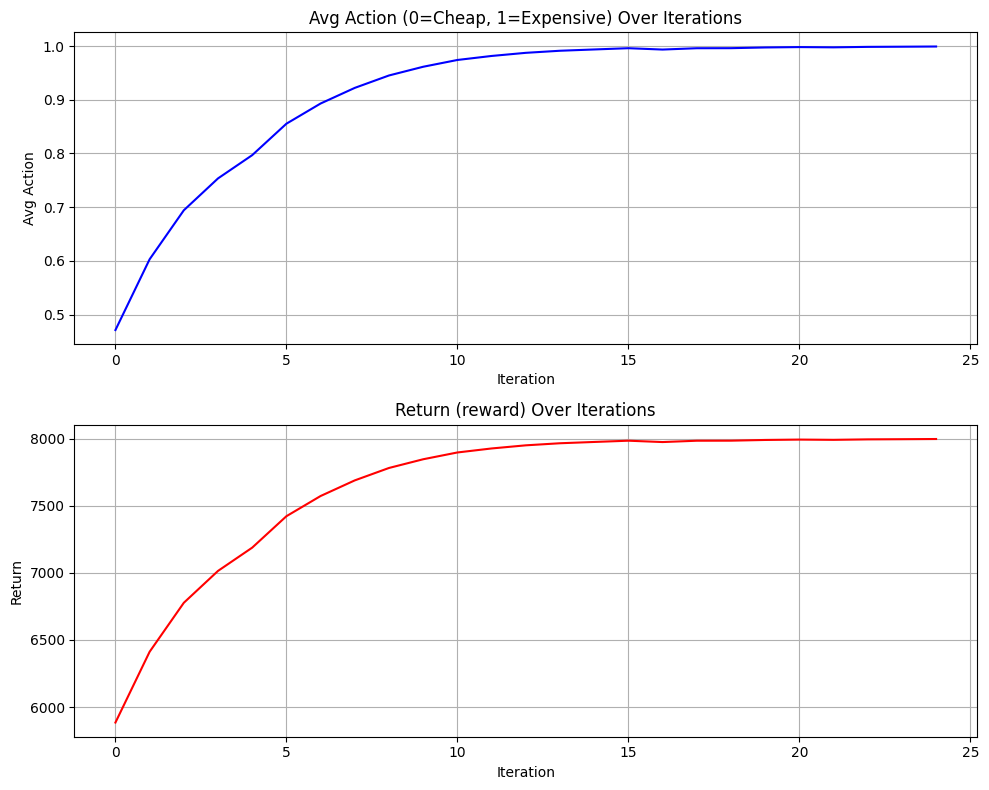

In [22]:
df = pd.read_csv("data/25_iter_20_agents_[3,8][2,6].csv")
graph_df(simplify_df(df))

#### In diners dilemma where cheaper is more rewarding but cheap joy is less than expensive joy agents learn defective policies and buy expensive

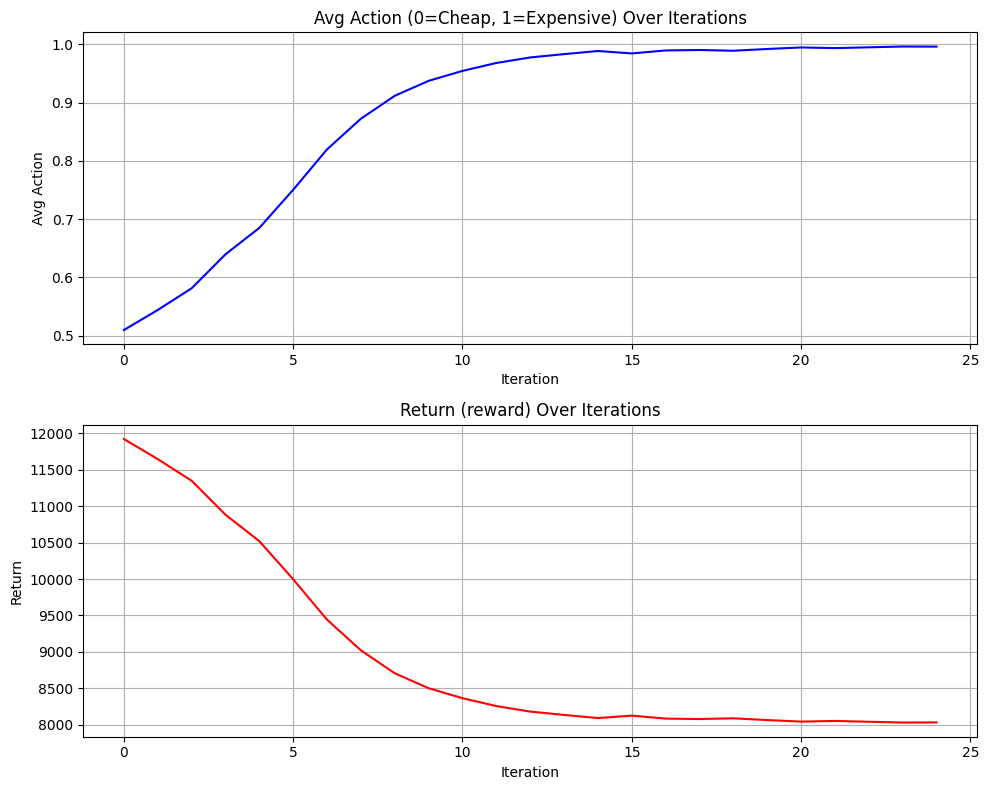

In [24]:
df_2 = pd.read_csv("data/25_iter_20_agents_[6,8][2,6].csv")
graph_df(simplify_df(df_2))

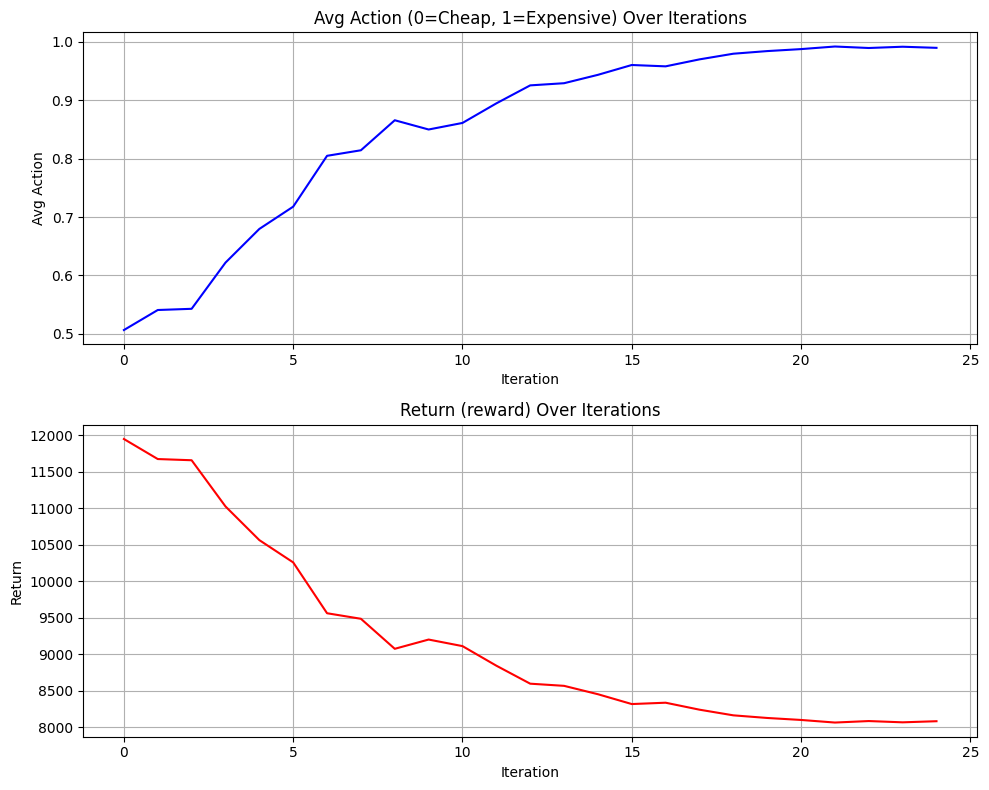

In [29]:
df_3 = pd.read_csv("data/25_iter_20_agents_[7,8][3,6].csv")
graph_df(simplify_df(df_3))

#### equal reward different cost agents learn beneficial policies and buy cheap

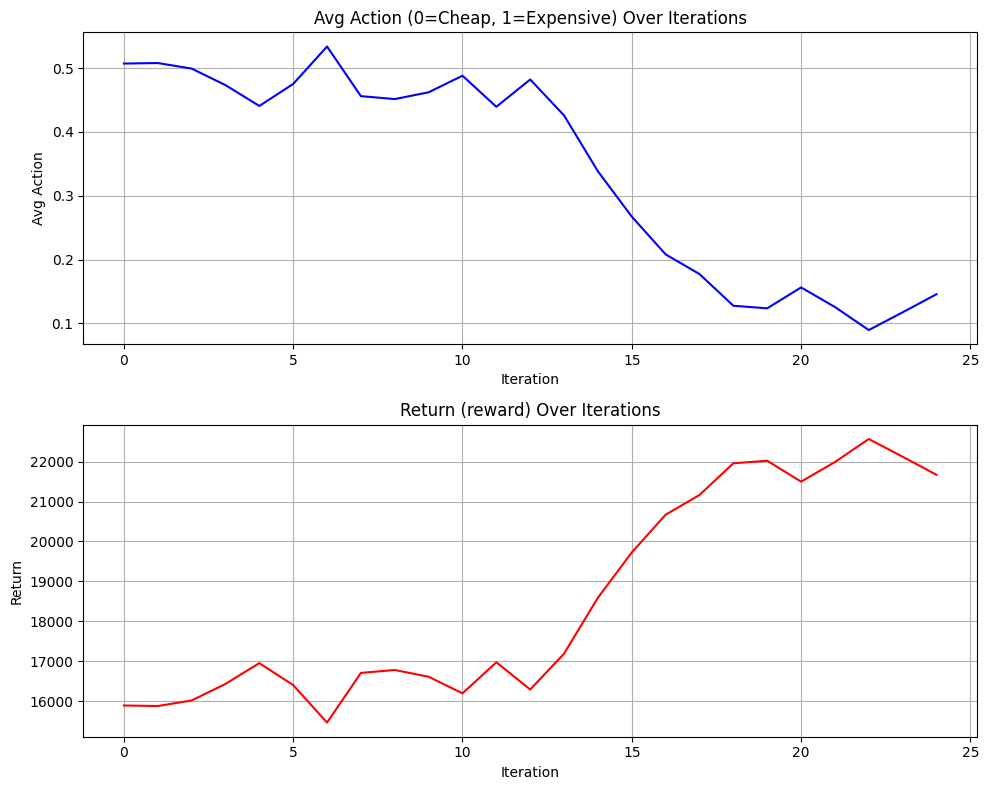

In [31]:
df_4 = pd.read_csv("data/25_iter_20_agents_[8,8][2,6].csv")
graph_df(simplify_df(df_4))